In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

## Load the spambase data

In [2]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
             'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet','word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
             'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free','word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
             'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money','word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
             'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857','word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
             'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct','word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
             'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
             'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Class']
df = pd.read_csv("data/spambase.csv", header=None, names=col_names)
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  Class  
0                       278      1  
1                      1028      1  
2                      2259      1  
3                       191      1  
4                       191      1  

[5 rows x 58 columns]

## Explore the data

In [3]:
print(df.shape)
df.describe()

(4601, 58)


word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
count      4601.000000     4601.000000  ...  4601.000000  4601.000000   
mean          0.090067        0.239413  ...     0.038575     0.139030   
std           0.278616        0.644755  ...     0.243471     0.270355   
min           0.000000        0.000000  ...     0.000000     0.000000   
25%           0.000000        0.000000  ...     0.000000     0.000000   
50%           0.000000        0.000000  ...     0.000000     0.065000   
75%           0.000000        0.160000  ...     0.000000     0.188000   
max           5.260000       18.180000  ...     4.385000     9.752000   

       char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
count  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.016976     0.269071     0.075811     0.044238   
std       0.109394     0.815672     0.245882     0.429342   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.315000     0.052000     0.000000   
max       4.081000    32.478000     6.003000    19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 4601.000000                 4601.000000   
mean                     5.191515                   52.172789   
std                     31.729449                  194.891310   
min                      1.000000                    1.000000   
25%                      1.588000                    6.000000   
50%                      2.276000                   15.000000   
75%                      3.706000                   43.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total        Class  
count               4601.000000  4601.000000  
mean                 283.289285     0.394045  
std                  606.347851     0.488698  
min                    1.000000     0.000000  
25%                   35.000000     0.000000  
50%                   95.000000     0.000000  
75%                  266.000000     1.000000  
max                15841.000000     1.000000  

[8 rows x 58 columns]

**Count says no missing data. Appears to be true**

In [4]:
df.Class.value_counts()

Class
0    2788
1    1813
Name: count, dtype: int64

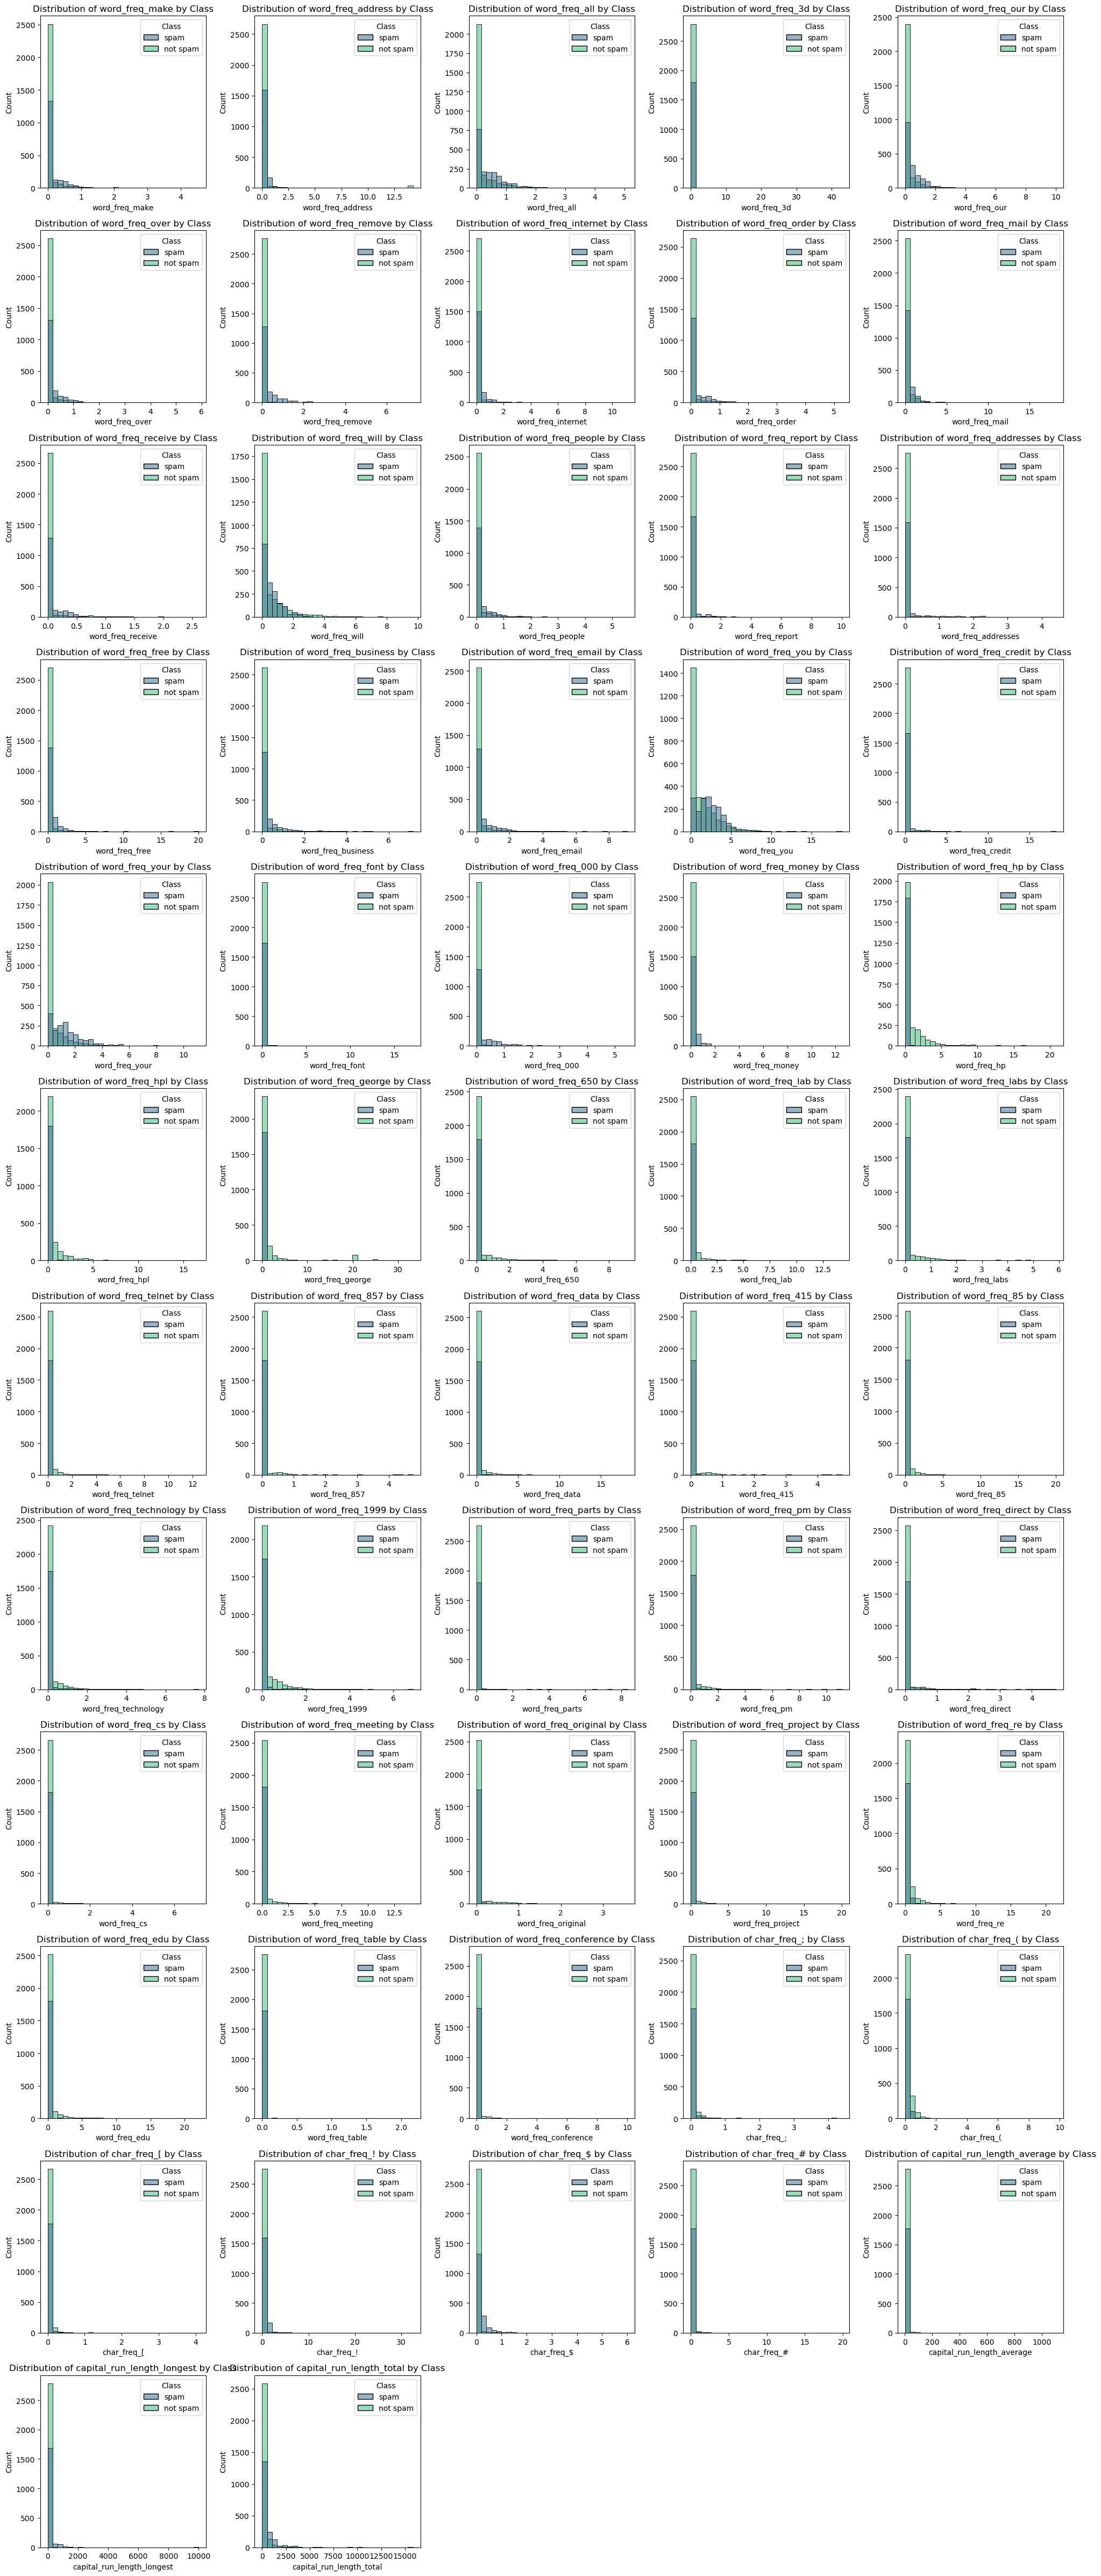

In [5]:
# Plotting the distribution of features to understand their range and relationship with the target variable
features = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
             'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet','word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
             'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free','word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
             'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money','word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
             'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857','word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
             'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct','word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
             'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
             'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

# Change the label 1 and 0 to spam and not spam for better readability
df['Class'] = df['Class'].replace({1: 'spam', 0: 'not spam'})

# Define the number of columns and calculate the number of rows needed
num_columns = 5
num_features = len(features)
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)

plt.figure(figsize=(20, num_rows * 4))  # Adjust height based on the number of rows

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_columns, i + 1)  # Adjusting the index for subplot
    sns.histplot(data=df, x=feature, hue='Class', bins=30, kde=False, palette='viridis')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Each charts show the frequency of word/char appears. Words like 'you' and 'will' seems to appear a lot more. Might influence majority of the model**

## Split data into train and test data

In [6]:
X = df.drop(columns = 'Class')
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicting the target on the test set
yhat = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)

print('Accuracy:', accuracy)
print('Confusion Matrix:', conf_matrix)

Accuracy: 0.9077090119435396
Confusion Matrix: [[494  37]
 [ 48 342]]


**Model has a 91% accuracy. Reasonably good model**

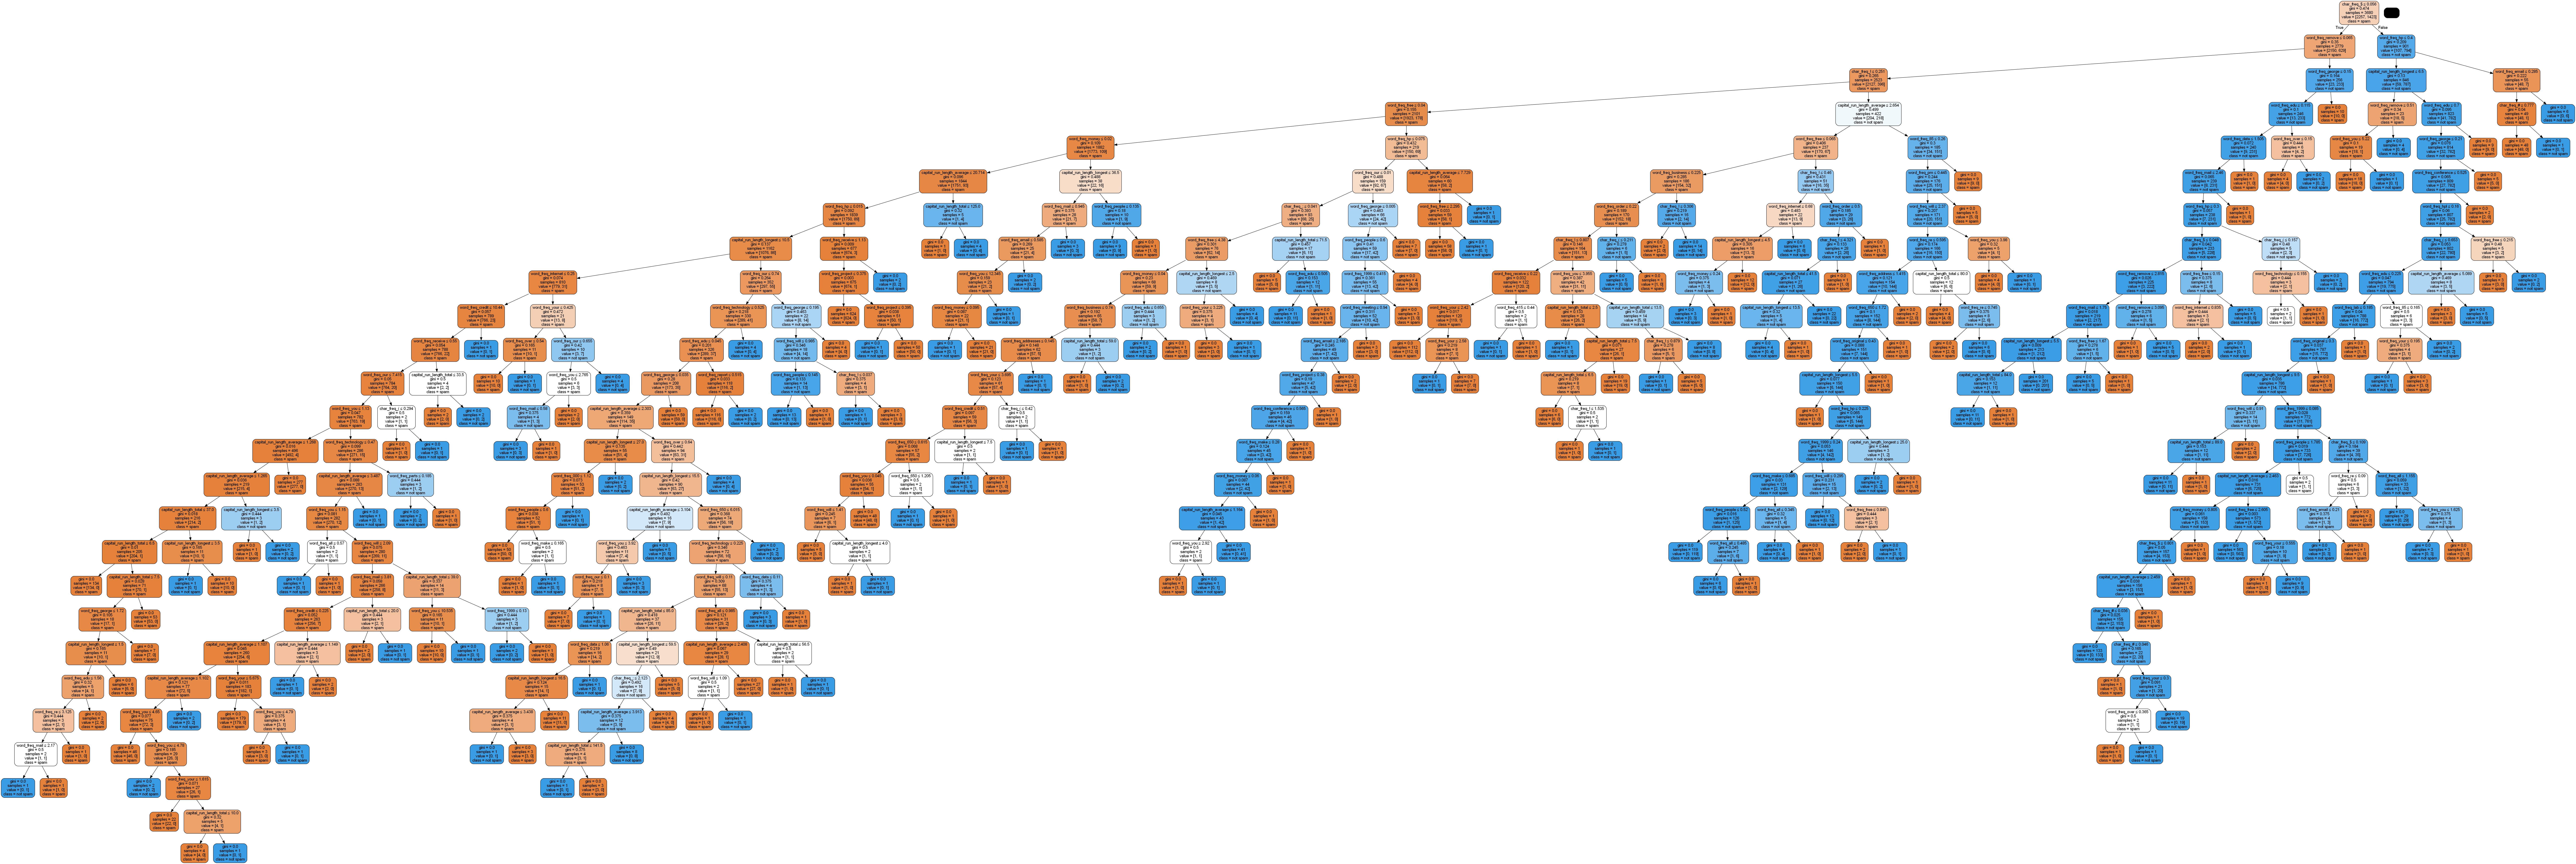

In [8]:
target_names = ["spam", "not spam"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = features,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/spambase.png')
Image(graph.create_png())

**Clearly overfitted the model**

## Finding best tree using cross validation

In [9]:
for d in range(2, 20):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Depth: {d}, Mean Cross-Validation Score: {scores.mean():.4f}")

Depth: 2, Mean Cross-Validation Score: 0.8677
Depth: 3, Mean Cross-Validation Score: 0.8785
Depth: 4, Mean Cross-Validation Score: 0.9016
Depth: 5, Mean Cross-Validation Score: 0.9060
Depth: 6, Mean Cross-Validation Score: 0.9109
Depth: 7, Mean Cross-Validation Score: 0.9144
Depth: 8, Mean Cross-Validation Score: 0.9163
Depth: 9, Mean Cross-Validation Score: 0.9204
Depth: 10, Mean Cross-Validation Score: 0.9136
Depth: 11, Mean Cross-Validation Score: 0.9174
Depth: 12, Mean Cross-Validation Score: 0.9171
Depth: 13, Mean Cross-Validation Score: 0.9185
Depth: 14, Mean Cross-Validation Score: 0.9160
Depth: 15, Mean Cross-Validation Score: 0.9117
Depth: 16, Mean Cross-Validation Score: 0.9144
Depth: 17, Mean Cross-Validation Score: 0.9166
Depth: 18, Mean Cross-Validation Score: 0.9163
Depth: 19, Mean Cross-Validation Score: 0.9136


**Depth of 9 has the highest score, therefore its the best depth for decision**

Accuracy: 0.9218241042345277
Confusion Matrix: [[508  23]
 [ 49 341]]


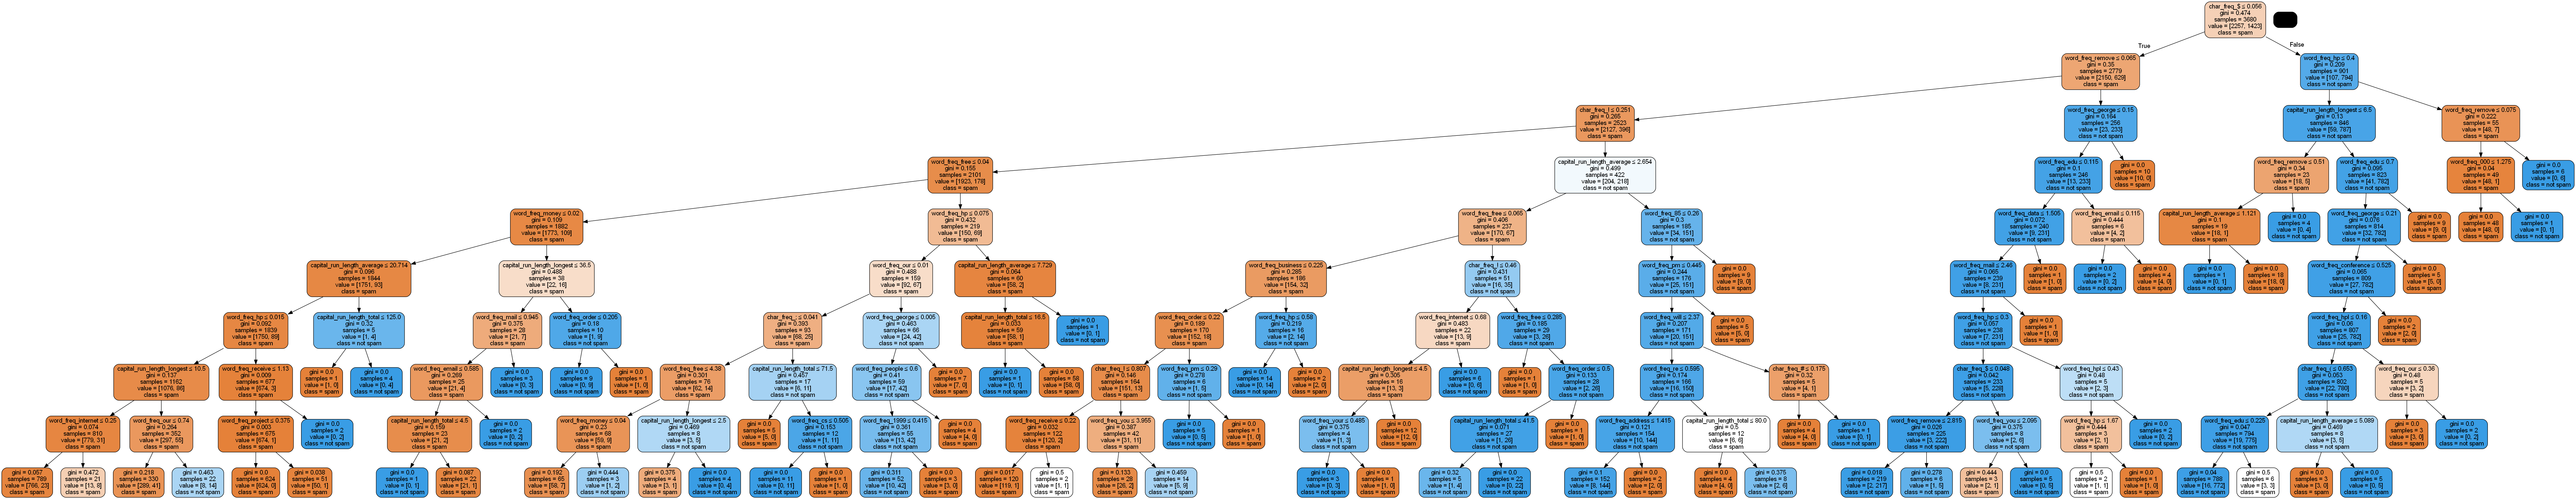

In [11]:
model = DecisionTreeClassifier(max_depth = 9)
model.fit(X_train, y_train)
# Predicting the target on the test set
yhat = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)

print('Accuracy:', accuracy)
print('Confusion Matrix:', conf_matrix)

target_names = ["spam", "not spam"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = features,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/spambase_bestDepth.png')
Image(graph.create_png())